In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

path = './data/feats_lbls/lblr6/'

feats = pd.DataFrame()
labels = pd.DataFrame()

for filename in os.listdir(path):
    if filename.startswith('feats'):
        feats = feats.append(pd.read_csv(path+filename, header = None))

    if filename.startswith('lbls'):
        labels = labels.append(pd.read_csv(path+filename, header = None))

feats.info

/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_81170/2162259012.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels = labels.append(pd.read_csv(path+filename, header = None))
/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_81170/2162259012.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feats = feats.append(pd.read_csv(path+filename, header = None))
/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_81170/2162259012.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feats = feats.append(pd.read_csv(path+filename, header = None))
/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_81170/2162259012.py:13: FutureWarning: The frame.append method is deprecated and will be remo

<bound method DataFrame.info of               0         1         2         3         4          5
0      4.198640 -0.623125  0.274384  0.000915  0.269380   0.000000
1      5.105784 -0.464731  0.261218  0.000881  0.263856   0.004792
2      5.619542 -0.477356  0.253959  0.000864  0.260508   0.008359
3      6.674655 -0.433280  0.252383  0.000864  0.259251   0.010760
4      7.443423 -0.412488  0.256267  0.000880  0.260002   0.012056
...         ...       ...       ...       ...       ...        ...
47238  0.184921  2.662051  0.162313  0.000539  1.046939  47.767952
47239  0.302691  2.404259  0.118228  0.000392  1.042884  48.457189
47240  0.572922  2.164345  0.076121  0.000252  1.034054  49.625913
47241  0.158600 -2.374707  0.036531  0.000121  1.019932  51.318036
47242  0.000000  0.000000  0.000000  0.000000  1.000000  53.577465

[492750 rows x 6 columns]>

In [52]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 40)]
criterion = ['gini', 'entropy', 'log_loss']
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 61, 112, 163, 214, 265, 316, 367, 418, 469, 520, 571, 622, 673, 724, 775, 826, 877, 928, 979, 1030, 1081, 1132, 1183, 1234, 1285, 1336, 1387, 1438, 1489, 1540, 1591, 1642, 1693, 1744, 1795, 1846, 1897, 1948, 2000], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 15, 20, 25, 31, 36, 41, 46, 52, 57, 62, 67, 73, 78, 83, 88, 94, 99, 104, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [80]:
X_train, X_test, y_train, y_test = train_test_split(feats, labels, test_size=0.3)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
#Create a Gaussian Classifier
clf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/ana

[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1030; total time= 1.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1030; total time= 1.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1030; total time= 1.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=112; total time=  17.3s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=724; total time= 1.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=724; total time= 1.8min
[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=724; total time= 1.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=112; total time=  17.2s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=112; total time=  17.7s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1540; total time= 2.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=214; total time=  21.6s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=214; total time=  21.3s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=214; total time=  20.8s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1795; total time= 3.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1795; total time= 3.0min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1795; total time= 3.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=214; total time=  21.5s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=214; total time=  21.6s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=214; total time=  21.1s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=775; total time= 2.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=775; total time= 2.0min
[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1540; total time= 2.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1540; total time= 2.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=775; total time= 2.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=520; total time= 1.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=520; total time= 1.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=520; total time= 1.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1285; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1285; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1285; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=112; total time=  18.2s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=112; total time=  18.1s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=112; total time=  18.0s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=41, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1336; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=41, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1336; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=41, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1336; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1948; total time= 5.5min
[CV] END bootstrap=False, max_depth=57, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1948; total time= 5.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1540; total time= 4.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1948; total time= 5.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=163; total time=  16.0s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=163; total time=  15.8s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1183; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=163; total time=  16.2s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1540; total time= 4.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1540; total time= 4.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1183; total time= 2.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1183; total time= 2.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=112; total time=  12.3s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=112; total time=  11.4s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=112; total time=  11.2s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1030; total time= 2.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=265; total time=  24.3s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=265; total time=  24.4s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=775; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=265; total time=  24.2s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=775; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1030; total time= 2.6min
[CV] END bootstrap=False, max_depth=99, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1030; total time= 2.6min
[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=775; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=469; total time=  40.5s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=469; total time=  39.5s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=469; total time=  40.0s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=94, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=367; total time=  55.4s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=94, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=367; total time=  54.2s
[CV] END bootstrap=False, max_depth=94, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=367; total time=  53.8s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1183; total time= 2.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1183; total time= 2.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1183; total time= 2.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=673; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=673; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=673; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1387; total time= 3.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1591; total time= 2.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1693; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1693; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1693; total time= 2.7min
[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=  59.4s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1387; total time= 3.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1387; total time= 3.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=  59.1s
[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=571; total time=  59.1s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=418; total time= 1.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1591; total time= 2.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=418; total time= 1.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=418; total time= 1.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=46, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1591; total time= 2.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1030; total time= 1.7min
[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1030; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1030; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=41, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=469; total time= 1.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=41, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=469; total time= 1.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=41, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=469; total time= 1.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=104, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=673; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=104, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=673; total time= 1.7min
[CV] END bootstrap=False, max_depth=104, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=673; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.6s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.6s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   1.7s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=979; total time= 2.6min
[CV] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=979; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=979; total time= 2.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1846; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=979; total time= 2.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1846; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=52, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1846; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=979; total time= 2.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1336; total time= 2.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=979; total time= 2.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1336; total time= 2.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1336; total time= 2.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=83, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=928; total time= 2.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=83, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=928; total time= 2.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=83, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=928; total time= 2.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1132; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1132; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=36, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1132; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1387; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1693; total time= 4.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=31, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1591; total time= 4.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1693; total time= 4.4min
[CV] END bootstrap=False, max_depth=73, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1693; total time= 4.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1387; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=31, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1591; total time= 4.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1387; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=31, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1591; total time= 4.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1489; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1489; total time= 1.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1489; total time= 1.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=83, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1591; total time= 4.1min
[CV] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=265; total time=  31.1s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=265; total time=  21.5s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=265; total time=  21.4s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1132; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1132; total time=20.2min
[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1132; total time=20.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=112; total time=17.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=112; total time=17.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=52, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=112; total time=  17.0s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=83, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1591; total time=21.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=83, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1591; total time=21.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=979; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=979; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=979; total time= 1.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1387; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=36, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1948; total time=23.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1387; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1387; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=36, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1948; total time=24.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=36, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1948; total time=24.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1948; total time= 7.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1948; total time= 7.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1948; total time= 7.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1642; total time= 6.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=36, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=520; total time= 1.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1744; total time= 4.9min
[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1744; total time= 4.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=36, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=520; total time= 1.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1744; total time= 4.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=36, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=520; total time= 1.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1642; total time= 7.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1846; total time= 5.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1642; total time= 7.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1846; total time= 5.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1846; total time= 5.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1132; total time= 3.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1132; total time= 3.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1948; total time= 5.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1948; total time= 5.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1132; total time= 3.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1948; total time= 5.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1234; total time= 6.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1234; total time= 6.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=99, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1234; total time= 6.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=877; total time= 4.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=877; total time= 4.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=877; total time= 4.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1387; total time= 4.7min
[CV] END bootstrap=True, max_depth=83, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1387; total time= 4.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1387; total time= 4.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1642; total time= 5.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=673; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1642; total time= 5.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1642; total time= 5.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=673; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=673; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1795; total time= 6.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1795; total time= 6.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1795; total time= 5.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=826; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=826; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=826; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1693; total time= 5.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1693; total time= 5.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1693; total time= 5.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=622; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1693; total time= 5.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1693; total time= 5.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=83, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1693; total time= 5.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=622; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=622; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=877; total time= 4.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=877; total time= 4.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=877; total time= 4.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=979; total time= 5.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=979; total time= 5.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=979; total time= 5.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=979; total time= 5.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=163; total time=  52.6s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=979; total time= 5.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1285; total time= 7.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=62, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=979; total time= 5.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1285; total time= 7.2min
[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1285; total time= 7.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=163; total time=  55.0s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=67, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=163; total time=  54.3s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1540; total time= 7.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=724; total time= 3.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=724; total time= 3.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=94, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=622; total time= 3.4min
[CV] END bootstrap=False, max_depth=88, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=724; total time= 3.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1387; total time= 4.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1387; total time= 4.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1387; total time= 4.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=316; total time=  59.7s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=316; total time=  59.5s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=316; total time=  59.4s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1540; total time= 8.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=57, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1540; total time= 7.9min
[CV] END bootstrap=False, max_depth=94, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=622; total time= 3.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=94, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=622; total time= 3.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1336; total time= 7.2min
[CV] END bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1336; total time= 7.2min
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1081; total time= 6.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1081; total time= 6.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1081; total time= 6.5min
[CV] END bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1336; total time= 7.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1642; total time= 7.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=571; total time= 2.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=571; total time= 2.0min
[CV] END bootstrap=False, max_depth=88, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=571; total time= 2.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=15.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=15.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=15.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1285; total time= 6.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1642; total time= 6.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=31, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1642; total time= 6.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1285; total time= 6.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=36, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1183; total time= 5.8min
[CV] END bootstrap=True, max_depth=36, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1183; total time= 5.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1285; total time= 6.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=36, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1183; total time= 2.5min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=979; total time= 3.8min
[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=979; total time= 3.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=73, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=979; total time= 4.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=673; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1081; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1081; total time= 2.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=41, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=877; total time= 4.2min
[CV] END bootstrap=False, max_depth=41, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=877; total time= 4.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1081; total time= 3.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=265; total time= 1.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=265; total time= 1.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=88, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=265; total time= 1.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=41, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=877; total time= 4.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=673; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=94, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=673; total time= 2.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=104, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=877; total time= 3.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=104, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=877; total time= 3.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=104, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=877; total time= 3.7min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=78, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=622; total time= 2.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=78, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=622; total time= 2.2min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=78, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=622; total time= 2.1min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1489; total time= 6.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1489; total time= 5.9min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=67, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1489; total time= 5.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1387; total time= 8.0min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1387; total time= 7.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=1387; total time= 7.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=61; total time=   4.2s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1540; total time= 4.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=61; total time=   4.1s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=61; total time=   4.3s


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1540; total time= 4.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=104, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1540; total time= 3.6min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=57, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1693; total time= 3.8min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=36, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=877; total time= 1.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=36, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=877; total time= 1.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=36, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=877; total time= 1.4min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=57, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1693; total time= 3.3min


/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=57, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1693; total time= 3.1min
[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1795; total time= 3.0min
[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1795; total time= 2.8min
[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1795; total time= 2.8min
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1795; total time= 2.2min
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1795; total time= 2.2min
[CV] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1795; total time= 2.2min
[CV] END bootstrap=False, max_depth=88, m

/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 61, 112, 163, 214,
                                                         265, 316, 367, 418,
                                                         469, 520, 571, 622,
                                                         673, 724, 775, 826,
                                                         877, 928, 979, 1030,
                                                         1081, 1132, 1183, 1234,
                                                         1285, 1336, 1387, 1438,
                                                         1489, ...]},
                   random_state=42, verbose=2)

In [56]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=88, max_features='log2',
                       n_estimators=979)

In [57]:
rf_random.best_params_

{'n_estimators': 979,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 88,
 'bootstrap': False}

/var/folders/z7/01ndtdr56pn86m2ys1lwmlnh0000gn/T/ipykernel_33856/3677384289.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


f1: 0.7419323197645905
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81     14525
         1.0       0.84      0.58      0.69      2888
         2.0       0.70      0.66      0.68      7754
         3.0       0.75      0.59      0.66      5418

    accuracy                           0.74     30585
   macro avg       0.76      0.68      0.71     30585
weighted avg       0.74      0.74      0.74     30585



[]

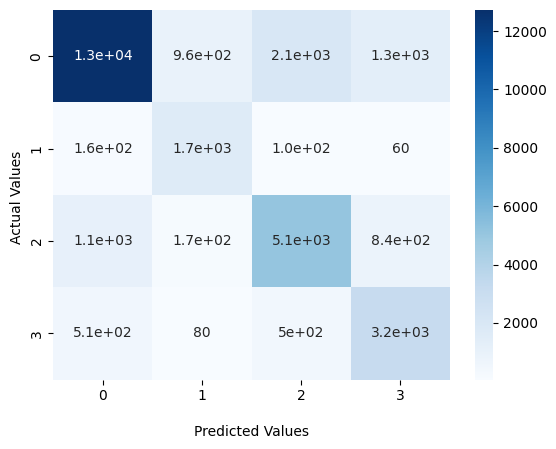

In [58]:

model = rf_random.best_estimator_
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy = []
false_negatives = []
# Model Accuracy, how often is the classifier correct?
print("f1:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

plt.plot()


<class 'sklearn.ensemble._forest.RandomForestClassifier'>  f1:  0.7226418178845839
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79     14465
         1.0       0.83      0.51      0.63      2884
         2.0       0.68      0.63      0.66      7834
         3.0       0.74      0.55      0.63      5402

    accuracy                           0.72     30585
   macro avg       0.74      0.64      0.68     30585
weighted avg       0.73      0.72      0.71     30585

<class 'xgboost.sklearn.XGBClassifier'>  f1:  0.6341997711296387
              precision    recall  f1-score   support

         0.0       0.65      0.84      0.73     14465
         1.0       0.68      0.32      0.43      2884
         2.0       0.59      0.55      0.57      7834
         3.0       0.61      0.39      0.48      5402

    accuracy                           0.63     30585
   macro avg       0.63      0.52      0.55     30585
weighted avg       0.63      0.63    

/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rubenotter/opt/anaconda3/envs/eye_movement/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

         0.0       0.47      1.00      0.64     14465
         1.0       0.06      0.00      0.00      2884
         2.0       0.00      0.00      0.00      7834
         3.0       0.25      0.00      0.00      5402

    accuracy                           0.47     30585
   macro avg       0.19      0.25      0.16     30585
weighted avg       0.27      0.47      0.30     30585

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>  f1:  0.526369135196992
              precision    recall  f1-score   support

         0.0       0.57      0.77      0.66     14465
         1.0       0.40      0.26      0.31      2884
         2.0       0.46      0.38      0.42      7834
         3.0       0.44      0.22      0.29      5402

    accuracy                           0.53     30585
   macro avg       0.47      0.41      0.42     30585
weighted avg       0.50      0.53      0.50     30585

<class 'sklearn.naive_bayes.GaussianNB'> 

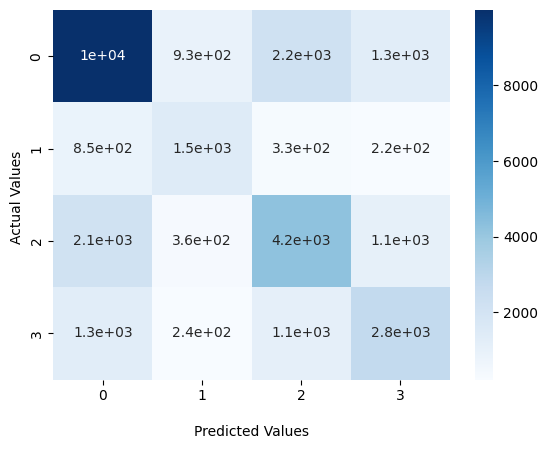

In [81]:
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = [RandomForestClassifier, XGBClassifier, LinearDiscriminantAnalysis, KNeighborsClassifier, GaussianNB, DecisionTreeClassifier]
for ml_model in models:
    #Create a Gaussian Classifier
    try:
        clf= ml_model(n_jobs = -1)
    except:
        clf= ml_model()

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)

    accuracy = []
    false_negatives = []

    print(str(ml_model).split('(')[0]," f1: ",metrics.accuracy_score(y_test, y_pred))

    print(classification_report(y_test, y_pred))
    
    plt.clf()
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    ## Ticket labels - List must be in alphabetical order
    #ax.xaxis.set_ticklabels(['False','True'])
    #ax.yaxis.set_ticklabels(['False','True'])

    plt.savefig('plots/' + str(ml_model) + '.png')